# Importing Libraries & Initiating Spark

In [1]:
import findspark
findspark.init()

In [2]:
import pyspark
from pyspark.context import SparkContext
from pyspark.sql import SparkSession 
sc = SparkContext.getOrCreate()
spark = SparkSession.builder.getOrCreate()
print(sc.version)
print(spark.version)

2.4.8
2.4.8


In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [4]:
import random
import platform

In [5]:
uname = platform.uname()
print(f"System: {uname.system}")
print(f"Node Name: {uname.node}")
print(f"Release: {uname.release}")
print(f"Version: {uname.version}")
print(f"Machine: {uname.machine}")
print(f"Processor: {uname.processor}")

System: Windows
Node Name: ece552-class01-
Release: 10
Version: 10.0.19041
Machine: AMD64
Processor: Intel64 Family 6 Model 85 Stepping 7, GenuineIntel


In [6]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType
from pyspark.sql.functions import round
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import OneHotEncoderEstimator
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from sklearn.metrics import confusion_matrix
from pyspark.ml.feature import StandardScaler
from pyspark.ml.classification import NaiveBayes

In [7]:
import pandas as pd
import numpy as np

In [8]:
import seaborn as sns

In [9]:
from pyspark.sql.functions import udf
from pyspark.sql.functions import countDistinct

In [10]:
import matplotlib.pyplot as mp

In [11]:
from pyspark.sql.functions import col

In [12]:
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType

In [13]:
from sklearn.metrics import  plot_confusion_matrix

# Reading CSV
## Dataset contains data for the Year 2022 (Till August)

In [14]:
airline22DF = spark.read.csv('NewDF.csv',sep=',',\
             header=True,inferSchema=True,nullValue='NA')

# Data Exploration

In [50]:
airline22DF.printSchema()

root
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_STATE_ABR: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DEST_STATE_ABR: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: integer (nullable = true)
 |-- DEP_DELAY_NEW: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_TIME: integer (nullable = true)
 |-- ARR_DELAY_NEW: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- CANCELLATION_CODE: string (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CARRIER_DELAY: double (nullable = true)
 |-- WEATHER_DELAY: double (nullable = true)
 |-- NAS_DELAY: double (nullable = true)
 |-- SECURITY_DELAY: double (nullable = true)
 |-- LATE_AIRCRAFT_DELAY: double (nullable = true)



In [51]:
airline22DF.count()

4495839

In [52]:
airline22DF.show()

+-----+------------+-----------+----------+------+----------------+----+--------------+------------+--------+-------------+------------+--------+-------------+---------+-----------------+--------+-------------+-------------+---------+--------------+-------------------+
|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_CARRIER|ORIGIN|ORIGIN_STATE_ABR|DEST|DEST_STATE_ABR|CRS_DEP_TIME|DEP_TIME|DEP_DELAY_NEW|CRS_ARR_TIME|ARR_TIME|ARR_DELAY_NEW|CANCELLED|CANCELLATION_CODE|DISTANCE|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY|
+-----+------------+-----------+----------+------+----------------+----+--------------+------------+--------+-------------+------------+--------+-------------+---------+-----------------+--------+-------------+-------------+---------+--------------+-------------------+
|    7|          13|          3|        WN|   FLL|              FL| BWI|            MD|        2225|    2310|         45.0|          55|     131|         36.0|      0.0|             null|   

In [53]:
airline22DF.describe().show()

+-------+------------------+-----------------+------------------+----------+-------+----------------+-------+--------------+------------------+------------------+------------------+-----------------+-----------------+------------------+--------------------+-----------------+-----------------+-----------------+------------------+------------------+-------------------+-------------------+
|summary|             MONTH|     DAY_OF_MONTH|       DAY_OF_WEEK|OP_CARRIER| ORIGIN|ORIGIN_STATE_ABR|   DEST|DEST_STATE_ABR|      CRS_DEP_TIME|          DEP_TIME|     DEP_DELAY_NEW|     CRS_ARR_TIME|         ARR_TIME|     ARR_DELAY_NEW|           CANCELLED|CANCELLATION_CODE|         DISTANCE|    CARRIER_DELAY|     WEATHER_DELAY|         NAS_DELAY|     SECURITY_DELAY|LATE_AIRCRAFT_DELAY|
+-------+------------------+-----------------+------------------+----------+-------+----------------+-------+--------------+------------------+------------------+------------------+-----------------+-----------------+---

In [54]:
pd.DataFrame(airline22DF.take(5), columns=airline22DF.columns).transpose()

,0,1,2,3,4
MONTH,7,7,7,7,7
DAY_OF_MONTH,13,13,13,13,13
DAY_OF_WEEK,3,3,3,3,3
OP_CARRIER,WN,WN,WN,WN,WN
ORIGIN,FLL,FLL,FLL,FLL,FLL
ORIGIN_STATE_ABR,FL,FL,FL,FL,FL
DEST,BWI,CMH,DAL,DAL,DCA
DEST_STATE_ABR,MD,OH,TX,TX,VA
CRS_DEP_TIME,2225,1735,1950,540,2020
DEP_TIME,2310,1736,2003,536,2032


In [55]:
#Summary statistics for numeric variables
numericFT = [t[0] for t in airline22DF.dtypes if t[1] == 'int']
airline22DF.select(numericFT).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
MONTH,4495839,4.602225969390807,2.2832487091110583,1,8
DAY_OF_MONTH,4495839,15.74299969371679,8.785371657845252,1,31
DAY_OF_WEEK,4495839,3.9771326330858376,2.0086860255016656,1,7
CRS_DEP_TIME,4495839,1330.6138311447542,493.5672209547867,1,2359
DEP_TIME,4368053,1334.9167299481028,509.31171143413604,1,2400
CRS_ARR_TIME,4495839,1485.752695325611,522.7565365548144,1,2400
ARR_TIME,4363705,1455.91461659301,548.3148591815058,1,2400


In [56]:
from pyspark.sql.functions import col,isnan, when, count
airline22DF.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in airline22DF.columns]).toPandas().transpose() #Missing Values

,0
MONTH,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
OP_CARRIER,0
ORIGIN,0
ORIGIN_STATE_ABR,0
DEST,0
DEST_STATE_ABR,0
CRS_DEP_TIME,0
DEP_TIME,127786


In [17]:
##airline22DF.coalesce(1).write.options(header='True', delimiter=',',emptyValue='') \
## .csv("airline22DF.csv") #Converting the merged files to one .csv file

# Parquet

In [57]:
airline22DFP= airline22DF
airline22DFP.write.parquet("airline22DFP.parquet")

In [58]:
airline22DFParq = spark.read.parquet("airline22DFP.parquet")

In [59]:
airline22DFParq.createOrReplaceTempView("airline22DFParq")

In [60]:
airline22DFParq.count()

4495839

# Exploratory Data Analysis

## 1. SQL

In [61]:
Q1 = spark.sql("SELECT CANCELLED, COUNT(CANCELLED) FROM airline22DFParq GROUP BY CANCELLED ORDER BY COUNT(CANCELLED) DESC" )
Q1.show()

+---------+----------------+
|CANCELLED|count(CANCELLED)|
+---------+----------------+
|      0.0|         4364855|
|      1.0|          130984|
+---------+----------------+



In [62]:
Q2 = spark.sql("SELECT ORIGIN, COUNT(ORIGIN) FROM airline22DFParq GROUP BY ORIGIN ORDER BY COUNT(ORIGIN) DESC" )
Q2.show()

+------+-------------+
|ORIGIN|count(ORIGIN)|
+------+-------------+
|   ATL|       211126|
|   DFW|       186153|
|   DEN|       177846|
|   ORD|       174632|
|   CLT|       129370|
|   LAX|       128733|
|   SEA|       115227|
|   LAS|       113490|
|   LGA|       113219|
|   PHX|       109608|
|   MCO|        97079|
|   DCA|        94913|
|   JFK|        90959|
|   BOS|        90122|
|   SFO|        86589|
|   EWR|        86395|
|   DTW|        86160|
|   IAH|        83758|
|   MSP|        81448|
|   MIA|        74568|
+------+-------------+
only showing top 20 rows



In [63]:
Q3 = spark.sql("SELECT OP_CARRIER, CANCELLED, COUNT(CANCELLED) FROM airline22DFParq GROUP BY OP_CARRIER,CANCELLED ORDER BY CANCELLED DESC, COUNT(CANCELLED) DESC" )
Q3.show(40)

+----------+---------+----------------+
|OP_CARRIER|CANCELLED|count(CANCELLED)|
+----------+---------+----------------+
|        AA|      1.0|           22038|
|        WN|      1.0|           21321|
|        YX|      1.0|           13311|
|        DL|      1.0|           10913|
|        OO|      1.0|           10255|
|        UA|      1.0|            9264|
|        B6|      1.0|            8182|
|        9E|      1.0|            6838|
|        OH|      1.0|            5761|
|        MQ|      1.0|            4493|
|        NK|      1.0|            4374|
|        AS|      1.0|            3872|
|        YV|      1.0|            3383|
|        G4|      1.0|            2994|
|        F9|      1.0|            2627|
|        QX|      1.0|             998|
|        HA|      1.0|             360|
|        WN|      0.0|          829493|
|        DL|      0.0|          579874|
|        AA|      0.0|          552242|
|        OO|      0.0|          494275|
|        UA|      0.0|          397663|


In [64]:
Q4 = spark.sql("N" )
Q4.show(100)

+------+---------+----------------+
|ORIGIN|CANCELLED|count(CANCELLED)|
+------+---------+----------------+
|   LGA|      1.0|            7367|
|   DFW|      1.0|            6662|
|   ORD|      1.0|            5795|
|   EWR|      1.0|            5410|
|   DCA|      1.0|            4722|
|   DEN|      1.0|            4575|
|   CLT|      1.0|            4242|
|   JFK|      1.0|            4216|
|   BOS|      1.0|            3803|
|   ATL|      1.0|            3661|
|   MCO|      1.0|            2612|
|   MIA|      1.0|            2401|
|   LAS|      1.0|            2310|
|   LAX|      1.0|            2098|
|   SEA|      1.0|            2081|
|   BWI|      1.0|            2059|
|   DTW|      1.0|            2015|
|   IAH|      1.0|            1964|
|   PHX|      1.0|            1879|
|   PHL|      1.0|            1866|
|   AUS|      1.0|            1785|
|   FLL|      1.0|            1773|
|   BNA|      1.0|            1766|
|   TPA|      1.0|            1494|
|   DAL|      1.0|          

In [65]:
airline22DFParq.select('CANCELLATION_CODE').distinct().show()

+-----------------+
|CANCELLATION_CODE|
+-----------------+
|             null|
|                B|
|                D|
|                C|
|                A|
+-----------------+



In [66]:
airline22DFParq.groupby('CANCELLATION_CODE').count().sort("CANCELLATION_CODE", ascending=True).show()

+-----------------+-------+
|CANCELLATION_CODE|  count|
+-----------------+-------+
|             null|4364855|
|                A|  49579|
|                B|  67132|
|                C|  13250|
|                D|   1023|
+-----------------+-------+



## 2. Defining User Functions

In [18]:
def convertTimeDay(s):
    res =""
    if s >= 0 and s < 600:
        res = "Red Eye"
    elif s >= 600 and s < 1200:
        res = "Morning"
    elif s >= 1200 and s < 1800:
        res = "Afternoon"
    elif s >= 1800 and s<=2400:
        res = "Evening"
    return res

In [19]:
def delayCheck(s):
    res=0
    if s > 15:
        res= 1
    elif s <=15:
        res =0
    elif s is None:
        res = 123
    return res

## 3. Visualizations

In [69]:
airline22DFPandas = pd.concat(map(pd.read_csv, ['2022_1.csv','2022_2.csv','2022_3.csv','2022_4.csv','2022_5.csv','2022_6.csv','2022_7.csv', '2022_8.csv',]))

In [70]:
airline22DFPandas['DEP_PARTOFDAY'] =  airline22DFPandas['CRS_DEP_TIME'].apply(lambda x: convertTimeDay(x)) 
airline22DFPandas['ARR_PARTOFDAY'] =  airline22DFPandas['CRS_ARR_TIME'].apply(lambda x: convertTimeDay(x))
airline22DFPandas['DELAY'] =  airline22DFPandas['DEP_DELAY_NEW'].apply(lambda x: delayCheck(x))

Text(0.5, 1.0, 'CANCELLATIONS COUNT')

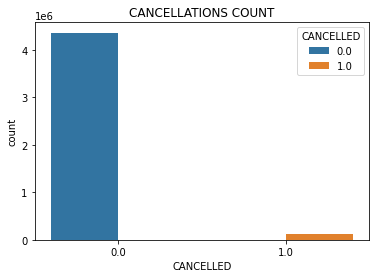

In [71]:
sns.countplot(data=airline22DFPandas,x='CANCELLED',hue='CANCELLED').set_title("CANCELLATIONS COUNT")

Text(0.5, 1.0, 'DELAY COUNT')

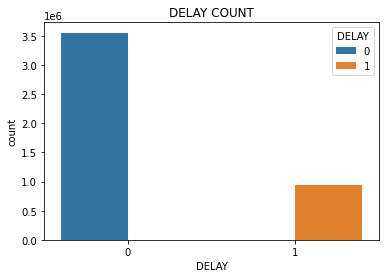

In [72]:
sns.countplot(data=airline22DFPandas,x='DELAY',hue='DELAY').set_title("DELAY COUNT")

Text(0.5, 1.0, 'PART OF DAY (DEPARTURE) COUNT')

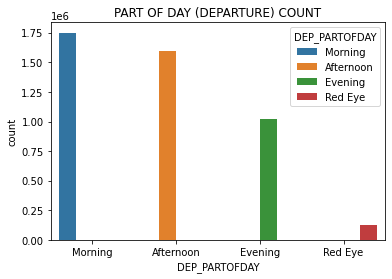

In [73]:
sns.countplot(data=airline22DFPandas,x='DEP_PARTOFDAY',hue='DEP_PARTOFDAY').set_title("PART OF DAY (DEPARTURE) COUNT")

Text(0.5, 1.0, 'PART OF DAY (ARRIVAL) COUNT')

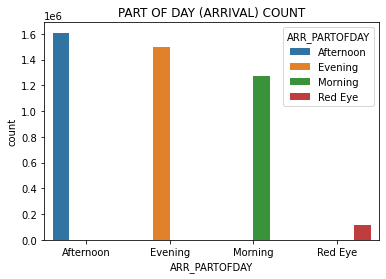

In [74]:
sns.countplot(data=airline22DFPandas,x='ARR_PARTOFDAY',hue='ARR_PARTOFDAY').set_title("PART OF DAY (ARRIVAL) COUNT")

<AxesSubplot:>

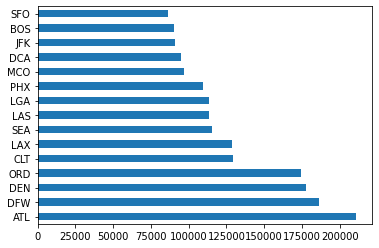

In [75]:
airline22DFPandas['ORIGIN'].value_counts()[:15].plot(kind='barh')

<AxesSubplot:>

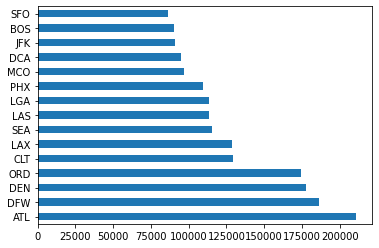

In [76]:
airline22DFPandas['DEST'].value_counts()[:15].plot(kind='barh')

<AxesSubplot:>

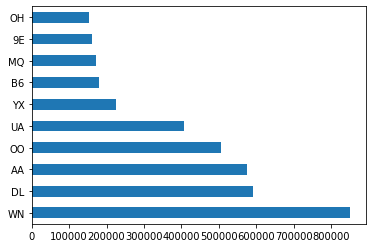

In [77]:
airline22DFPandas['OP_CARRIER'].value_counts()[:10].plot(kind='barh')

Text(0.5, 1.0, 'CANCELLATIONS COUNT PER PART OF DAY (DEPARTURE)')

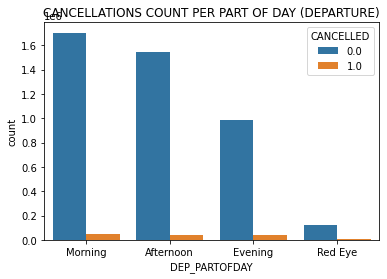

In [78]:
sns.countplot(data=airline22DFPandas,x='DEP_PARTOFDAY',hue='CANCELLED').set_title("CANCELLATIONS COUNT PER PART OF DAY (DEPARTURE)")

Text(0.5, 1.0, 'CANCELLATIONS COUNT PER PART OF DAY (ARRIVAL)')

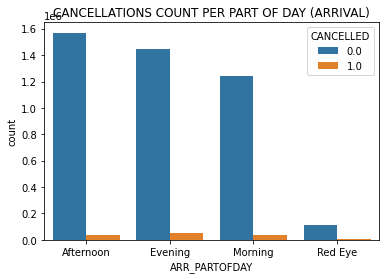

In [79]:
sns.countplot(data=airline22DFPandas,x='ARR_PARTOFDAY',hue='CANCELLED').set_title("CANCELLATIONS COUNT PER PART OF DAY (ARRIVAL)")

Text(0.5, 1.0, 'DELAY COUNT PER PART OF DAY (DEPARTURE)')

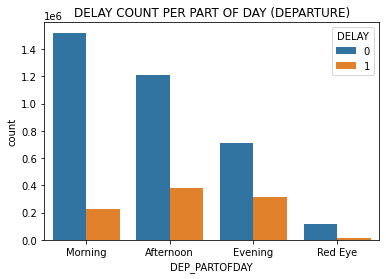

In [80]:
sns.countplot(data=airline22DFPandas,x='DEP_PARTOFDAY',hue='DELAY').set_title("DELAY COUNT PER PART OF DAY (DEPARTURE)")

Text(0.5, 1.0, 'DELAY COUNT PER PART OF DAY (ARIVAL)')

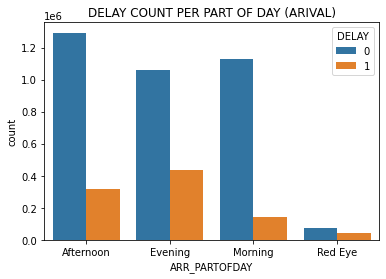

In [81]:
sns.countplot(data=airline22DFPandas,x='ARR_PARTOFDAY',hue='DELAY').set_title("DELAY COUNT PER PART OF DAY (ARIVAL)")

##### Analyzing Flight Cancellations

In [82]:
airline22DFPandas1=airline22DFPandas.groupby(["ORIGIN", "CANCELLED"])["CANCELLED"].count().reset_index(name="count")

In [83]:
type(airline22DFPandas1)
for col in airline22DFPandas1.columns:
    print(col)
airline22DFPandas1

ORIGIN
CANCELLED
count


,ORIGIN,CANCELLED,count
0,ABE,0.0,2927
1,ABE,1.0,79
2,ABI,0.0,1275
3,ABI,1.0,35
4,ABQ,0.0,12903
...,...,...,...
728,YAK,1.0,25
729,YKM,0.0,469
730,YKM,1.0,17
731,YUM,0.0,1095


In [84]:
airline22DFPandas1 = airline22DFPandas1.sort_values(by = ['CANCELLED', 'count'], ascending = [False, False])
airline22DFPandas1

,ORIGIN,CANCELLED,count
404,LGA,1.0,7367
192,DFW,1.0,6662
504,ORD,1.0,5795
238,EWR,1.0,5410
184,DCA,1.0,4722
...,...,...,...
411,LNK,0.0,32
489,OGD,0.0,27
195,DIK,0.0,7
48,ATY,0.0,2


In [85]:
airline22DFPandas11 = airline22DFPandas1
airline22DFPandas11 = airline22DFPandas11.loc[airline22DFPandas11['CANCELLED'] == 1] #Flights Cancelled per Origin

In [86]:
airline22DFPandas11

,ORIGIN,CANCELLED,count
404,LGA,1.0,7367
192,DFW,1.0,6662
504,ORD,1.0,5795
238,EWR,1.0,5410
184,DCA,1.0,4722
...,...,...,...
550,PRC,1.0,2
302,GUM,1.0,1
541,PIR,1.0,1
665,STC,1.0,1


In [87]:
airline22DFPandas10 = airline22DFPandas1
airline22DFPandas10 = airline22DFPandas10.loc[airline22DFPandas10['CANCELLED'] == 0] #Flights Not Cancelled per Origin
airline22DFPandas10

,ORIGIN,CANCELLED,count
44,ATL,0.0,207465
191,DFW,0.0,179491
189,DEN,0.0,173271
503,ORD,0.0,168837
385,LAX,0.0,126635
...,...,...,...
411,LNK,0.0,32
489,OGD,0.0,27
195,DIK,0.0,7
48,ATY,0.0,2


In [88]:
airline22DFPandas2=airline22DFPandas.groupby(["OP_CARRIER", "CANCELLED"])["CANCELLED"].count().reset_index(name="count")
type(airline22DFPandas2)
for col in airline22DFPandas2.columns:
    print(col)
airline22DFPandas2

OP_CARRIER
CANCELLED
count


,OP_CARRIER,CANCELLED,count
0,9E,0.0,155601
1,9E,1.0,6838
2,AA,0.0,552242
3,AA,1.0,22038
4,AS,0.0,146152
5,AS,1.0,3872
6,B6,0.0,171711
7,B6,1.0,8182
8,DL,0.0,579874
9,DL,1.0,10913


In [89]:
airline22DFPandas2 = airline22DFPandas2.sort_values(by = ['CANCELLED', 'count'], ascending = [False, False])
airline22DFPandas2

,OP_CARRIER,CANCELLED,count
3,AA,1.0,22038
29,WN,1.0,21321
33,YX,1.0,13311
9,DL,1.0,10913
23,OO,1.0,10255
27,UA,1.0,9264
7,B6,1.0,8182
1,9E,1.0,6838
21,OH,1.0,5761
17,MQ,1.0,4493


In [90]:
airline22DFPandas20 = airline22DFPandas2
airline22DFPandas20 = airline22DFPandas20.loc[airline22DFPandas20['CANCELLED'] == 0] #Flights Not Cancelled per Flight Carrier
airline22DFPandas20

,OP_CARRIER,CANCELLED,count
28,WN,0.0,829493
8,DL,0.0,579874
2,AA,0.0,552242
22,OO,0.0,494275
26,UA,0.0,397663
32,YX,0.0,211249
6,B6,0.0,171711
16,MQ,0.0,168158
0,9E,0.0,155601
20,OH,0.0,147516


In [91]:
airline22DFPandas21 = airline22DFPandas2
airline22DFPandas21 = airline22DFPandas21.loc[airline22DFPandas21['CANCELLED'] == 1] #Flights Cancelled per Flight Carrier
airline22DFPandas21

,OP_CARRIER,CANCELLED,count
3,AA,1.0,22038
29,WN,1.0,21321
33,YX,1.0,13311
9,DL,1.0,10913
23,OO,1.0,10255
27,UA,1.0,9264
7,B6,1.0,8182
1,9E,1.0,6838
21,OH,1.0,5761
17,MQ,1.0,4493


#### Analyzing Flight Delays

In [92]:
airline22DFPandasD1=airline22DFPandas.groupby(["ORIGIN", "DELAY"])["DELAY"].count().reset_index(name="COUNT") # Delay or Not Delay count from each origin
airline22DFPandasD1 = airline22DFPandasD1.sort_values(by = ['DELAY', 'COUNT'], ascending = [False, False])
airline22DFPandasD1

,ORIGIN,DELAY,COUNT
192,DEN,1,50795
45,ATL,1,42137
194,DFW,1,39371
506,ORD,1,34870
384,LAS,1,30403
...,...,...,...
343,ILG,0,26
550,PPG,0,19
491,OGD,0,14
197,DIK,0,8


In [93]:
airline22DFPandasD11 = airline22DFPandasD1.loc[airline22DFPandasD1['DELAY'] == 1] # Origin with Most number of flights with delay
airline22DFPandasD11

,ORIGIN,DELAY,COUNT
192,DEN,1,50795
45,ATL,1,42137
194,DFW,1,39371
506,ORD,1,34870
384,LAS,1,30403
...,...,...,...
663,SPN,1,11
296,GST,1,7
414,LNK,1,4
48,ATY,1,2


In [94]:
airline22DFPandasD10 = airline22DFPandasD1.loc[airline22DFPandasD1['DELAY'] == 0] # Origin with Most number of flights without delay
airline22DFPandasD10

,ORIGIN,DELAY,COUNT
44,ATL,0,168989
193,DFW,0,146782
505,ORD,0,139762
191,DEN,0,127051
387,LAX,0,106081
...,...,...,...
343,ILG,0,26
550,PPG,0,19
491,OGD,0,14
197,DIK,0,8


In [95]:
airline22DFPandasD11Top10=airline22DFPandasD11.head(10)
airline22DFPandasD10Top10= airline22DFPandasD10.head(10)

In [96]:
airline22DFPandasD2=airline22DFPandas.groupby(["OP_CARRIER", "DELAY"])["DELAY"].count().reset_index(name="COUNT") # Delay or Not Delay count from each Flight Carrier
airline22DFPandasD2 = airline22DFPandasD2.sort_values(by = ['DELAY', 'COUNT'], ascending = [False, False])
airline22DFPandasD2

,OP_CARRIER,DELAY,COUNT
29,WN,1,241495
3,AA,1,120292
9,DL,1,100504
27,UA,1,82610
23,OO,1,77018
7,B6,1,57492
33,YX,1,38180
19,NK,1,34241
11,F9,1,29499
21,OH,1,28644


In [97]:
airline22DFPandasD21 = airline22DFPandasD2.loc[airline22DFPandasD2['DELAY'] == 1] # Carrier with Most number of flights delay
airline22DFPandasD21

,OP_CARRIER,DELAY,COUNT
29,WN,1,241495
3,AA,1,120292
9,DL,1,100504
27,UA,1,82610
23,OO,1,77018
7,B6,1,57492
33,YX,1,38180
19,NK,1,34241
11,F9,1,29499
21,OH,1,28644


In [98]:
airline22DFPandasD20 = airline22DFPandasD2.loc[airline22DFPandasD2['DELAY'] == 0] # Carrier with Most number of flights without delay
airline22DFPandasD20

,OP_CARRIER,DELAY,COUNT
28,WN,0,609319
8,DL,0,490283
2,AA,0,453988
22,OO,0,427512
26,UA,0,324317
32,YX,0,186380
16,MQ,0,147383
0,9E,0,140021
4,AS,0,126116
20,OH,0,124633


In [99]:
airline22DFPandasD21Top10=airline22DFPandasD21.head(10)
airline22DFPandasD20Top10= airline22DFPandasD20.head(10)

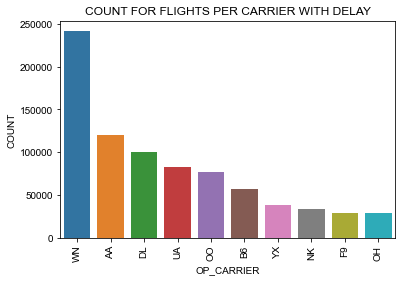

In [100]:
sns.barplot(x="OP_CARRIER", y="COUNT", data=airline22DFPandasD21Top10,ci=0).set_title("COUNT FOR FLIGHTS PER CARRIER WITH DELAY")
mp.xticks(rotation=90)
sns.set(rc = {'figure.figsize':(12,5)})

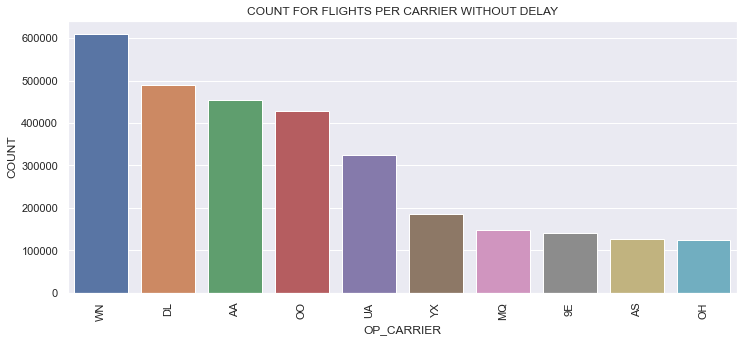

In [101]:
g = sns.barplot(x="OP_CARRIER", y="COUNT", data=airline22DFPandasD20Top10,ci=0).set_title("COUNT FOR FLIGHTS PER CARRIER WITHOUT DELAY")
mp.xticks(rotation=90)
sns.set(rc = {'figure.figsize':(12,5)})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'DL'),
  Text(1, 0, 'F9'),
  Text(2, 0, 'G4'),
  Text(3, 0, 'HA'),
  Text(4, 0, 'MQ'),
  Text(5, 0, 'NK'),
  Text(6, 0, 'OH'),
  Text(7, 0, '9E'),
  Text(8, 0, 'AA'),
  Text(9, 0, 'AS'),
  Text(10, 0, 'B6'),
  Text(11, 0, 'YX'),
  Text(12, 0, 'OO'),
  Text(13, 0, 'UA'),
  Text(14, 0, 'YV'),
  Text(15, 0, 'QX'),
  Text(16, 0, 'WN')])

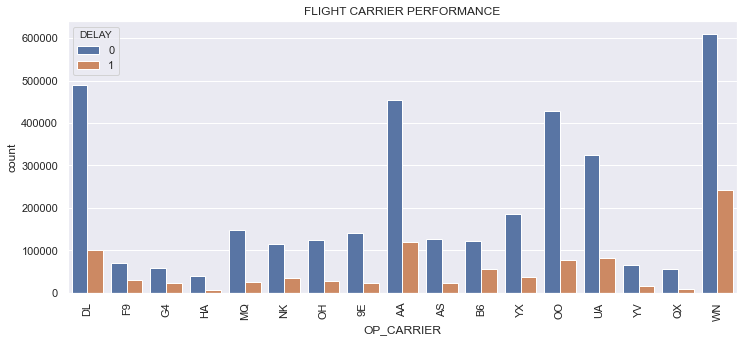

In [102]:
sns.countplot(x="OP_CARRIER", hue="DELAY", data=airline22DFPandas).set_title("FLIGHT CARRIER PERFORMANCE")
sns.set(rc = {'figure.figsize':(16,8)})
mp.xticks(rotation=90)

In [103]:
orAr = ['PHX', 'LGA', 'LAS', 'SEA', 'LAX', 'CLT', 'ORD', 'DEN', 'DFW', 'ATL', 'MCO', 'DCA', 'JFK', 'BOS', 'SFO']

In [104]:
airline22DFPandasOr = airline22DFPandas.loc[airline22DFPandas['ORIGIN'].isin(orAr)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'ATL'),
  Text(1, 0, 'LGA'),
  Text(2, 0, 'BOS'),
  Text(3, 0, 'SEA'),
  Text(4, 0, 'MCO'),
  Text(5, 0, 'CLT'),
  Text(6, 0, 'JFK'),
  Text(7, 0, 'LAS'),
  Text(8, 0, 'DCA'),
  Text(9, 0, 'LAX'),
  Text(10, 0, 'DFW'),
  Text(11, 0, 'ORD'),
  Text(12, 0, 'PHX'),
  Text(13, 0, 'DEN'),
  Text(14, 0, 'SFO')])

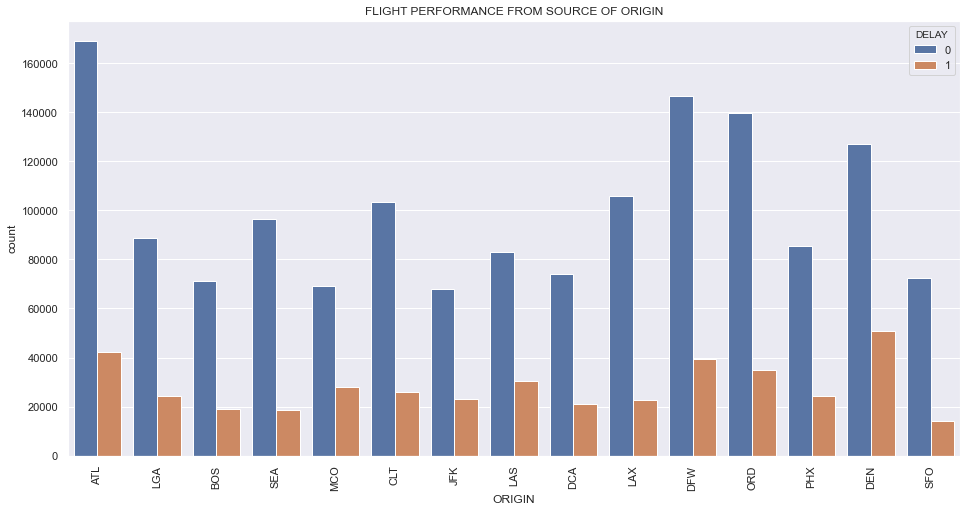

In [105]:
sns.countplot(x="ORIGIN", hue="DELAY", data=airline22DFPandasOr).set_title("FLIGHT PERFORMANCE FROM SOURCE OF ORIGIN")
sns.set(rc = {'figure.figsize':(16,8)})
mp.xticks(rotation=90)

### Finding Count of Delayed Flights utilizing Pyspark

In [106]:
airline22DFNew = airline22DF.withColumn('TargetDel', (airline22DF.DEP_DELAY_NEW >= 15).cast('integer')) 

In [107]:
airline22DFNew.groupby("TargetDel").count().show()

+---------+-------+
|TargetDel|  count|
+---------+-------+
|     null| 127851|
|        1| 969441|
|        0|3398547|
+---------+-------+



In [108]:
airline22DFNew1 = airline22DFNew
airline22DFNew10 = airline22DFNew1.filter("CANCELLED == 0")                   
airline22DFNew11 = airline22DFNew1.filter("CANCELLED == 1")                       

In [109]:
airline22DFNew10.groupby("TargetDel").count().show()

+---------+-------+
|TargetDel|  count|
+---------+-------+
|        1| 967677|
|        0|3397178|
+---------+-------+



In [110]:
airline22DFNew11.groupby("TargetDel").count().show()

+---------+------+
|TargetDel| count|
+---------+------+
|     null|127851|
|        1|  1764|
|        0|  1369|
+---------+------+



##### **All Null Values are for the flights which had been cancelled.

# Machine Learning Model

In [14]:
airline22DFM = spark.read.csv('2022*.csv',sep=',',header=True,inferSchema=True,nullValue='NA')
airline22DFM.printSchema()

root
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_STATE_ABR: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DEST_STATE_ABR: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: integer (nullable = true)
 |-- DEP_DELAY_NEW: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_TIME: integer (nullable = true)
 |-- ARR_DELAY_NEW: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- CANCELLATION_CODE: string (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CARRIER_DELAY: double (nullable = true)
 |-- WEATHER_DELAY: double (nullable = true)
 |-- NAS_DELAY: double (nullable = true)
 |-- SECURITY_DELAY: double (nullable = true)
 |-- LATE_AIRCRAFT_DELAY: double (nullable = true)



In [15]:
airline22DFMD =  airline22DFM.drop('CANCELLATION_CODE') #Removing Unwanted Column

In [16]:
airline22DFMD.printSchema()

root
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_STATE_ABR: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DEST_STATE_ABR: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: integer (nullable = true)
 |-- DEP_DELAY_NEW: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_TIME: integer (nullable = true)
 |-- ARR_DELAY_NEW: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CARRIER_DELAY: double (nullable = true)
 |-- WEATHER_DELAY: double (nullable = true)
 |-- NAS_DELAY: double (nullable = true)
 |-- SECURITY_DELAY: double (nullable = true)
 |-- LATE_AIRCRAFT_DELAY: double (nullable = true)



In [17]:
airline22DFMDN = airline22DFMD.na.drop(subset="DEP_DELAY_NEW")
airline22DFMDN.printSchema()

root
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_STATE_ABR: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DEST_STATE_ABR: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: integer (nullable = true)
 |-- DEP_DELAY_NEW: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_TIME: integer (nullable = true)
 |-- ARR_DELAY_NEW: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CARRIER_DELAY: double (nullable = true)
 |-- WEATHER_DELAY: double (nullable = true)
 |-- NAS_DELAY: double (nullable = true)
 |-- SECURITY_DELAY: double (nullable = true)
 |-- LATE_AIRCRAFT_DELAY: double (nullable = true)



In [20]:
newTUDF1 = udf(lambda z: convertTimeDay(z))

In [21]:
newTUDF2 = udf(lambda x: delayCheck(x))

In [22]:
airline22DFMDN1 = airline22DFMDN.withColumn("DEPPARTOFDAY", newTUDF1(col("CRS_DEP_TIME")))

In [23]:
airline22DFMDN1 = airline22DFMDN1.withColumn("DELAYED", newTUDF2(col("DEP_DELAY_NEW")))

In [24]:
airline22DFMDN1.show()

+-----+------------+-----------+----------+------+----------------+----+--------------+------------+--------+-------------+------------+--------+-------------+---------+--------+-------------+-------------+---------+--------------+-------------------+------------+-------+
|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_CARRIER|ORIGIN|ORIGIN_STATE_ABR|DEST|DEST_STATE_ABR|CRS_DEP_TIME|DEP_TIME|DEP_DELAY_NEW|CRS_ARR_TIME|ARR_TIME|ARR_DELAY_NEW|CANCELLED|DISTANCE|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY|DEPPARTOFDAY|DELAYED|
+-----+------------+-----------+----------+------+----------------+----+--------------+------------+--------+-------------+------------+--------+-------------+---------+--------+-------------+-------------+---------+--------------+-------------------+------------+-------+
|    7|          13|          3|        WN|   FLL|              FL| BWI|            MD|        2225|    2310|         45.0|          55|     131|         36.0|      0.0|   925.0|   

In [25]:
airline22DFMDN1[['CRS_DEP_TIME','DEP_DELAY_NEW','DEPPARTOFDAY','DELAYED']].show() #Ensuring UDFs are functioning as intended

+------------+-------------+------------+-------+
|CRS_DEP_TIME|DEP_DELAY_NEW|DEPPARTOFDAY|DELAYED|
+------------+-------------+------------+-------+
|        2225|         45.0|     Evening|      1|
|        1735|          1.0|   Afternoon|      0|
|        1950|         13.0|     Evening|      0|
|         540|          0.0|     Red Eye|      0|
|        2020|         12.0|     Evening|      0|
|        1145|          0.0|     Morning|      0|
|        1555|         30.0|   Afternoon|      1|
|         710|          0.0|     Morning|      0|
|        2000|         22.0|     Evening|      1|
|        1630|          4.0|   Afternoon|      0|
|        1030|          0.0|     Morning|      0|
|        1955|        120.0|     Evening|      1|
|        1035|          0.0|     Morning|      0|
|        1015|          0.0|     Morning|      0|
|        1945|         55.0|     Evening|      1|
|         530|          0.0|     Red Eye|      0|
|         605|          0.0|     Morning|      0|


In [26]:
airline22DFMDN1.groupby("DELAYED").count().show()

+-------+-------+
|DELAYED|  count|
+-------+-------+
|      0|3430182|
|      1| 937806|
+-------+-------+



In [27]:
airline22DFMDN1.printSchema()

root
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_STATE_ABR: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DEST_STATE_ABR: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: integer (nullable = true)
 |-- DEP_DELAY_NEW: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_TIME: integer (nullable = true)
 |-- ARR_DELAY_NEW: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CARRIER_DELAY: double (nullable = true)
 |-- WEATHER_DELAY: double (nullable = true)
 |-- NAS_DELAY: double (nullable = true)
 |-- SECURITY_DELAY: double (nullable = true)
 |-- LATE_AIRCRAFT_DELAY: double (nullable = true)
 |-- DEPPARTOFDAY: string (nullable = true)
 |-- DELAYED: string (nullable = true)



In [28]:
airline22DFMDN1 = airline22DFMDN1.withColumn("DELAYED",airline22DFMDN1.DELAYED.cast(IntegerType()))

In [29]:
airline22DFMDN1.printSchema()

root
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_STATE_ABR: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DEST_STATE_ABR: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: integer (nullable = true)
 |-- DEP_DELAY_NEW: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_TIME: integer (nullable = true)
 |-- ARR_DELAY_NEW: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CARRIER_DELAY: double (nullable = true)
 |-- WEATHER_DELAY: double (nullable = true)
 |-- NAS_DELAY: double (nullable = true)
 |-- SECURITY_DELAY: double (nullable = true)
 |-- LATE_AIRCRAFT_DELAY: double (nullable = true)
 |-- DEPPARTOFDAY: string (nullable = true)
 |-- DELAYED: integer (nullable = true)



In [30]:
airline22DFMDN1[['CRS_DEP_TIME','DEP_DELAY_NEW','DEPPARTOFDAY','DELAYED']].show() #Ensuring UDFs are functioning as intended

+------------+-------------+------------+-------+
|CRS_DEP_TIME|DEP_DELAY_NEW|DEPPARTOFDAY|DELAYED|
+------------+-------------+------------+-------+
|        2225|         45.0|     Evening|      1|
|        1735|          1.0|   Afternoon|      0|
|        1950|         13.0|     Evening|      0|
|         540|          0.0|     Red Eye|      0|
|        2020|         12.0|     Evening|      0|
|        1145|          0.0|     Morning|      0|
|        1555|         30.0|   Afternoon|      1|
|         710|          0.0|     Morning|      0|
|        2000|         22.0|     Evening|      1|
|        1630|          4.0|   Afternoon|      0|
|        1030|          0.0|     Morning|      0|
|        1955|        120.0|     Evening|      1|
|        1035|          0.0|     Morning|      0|
|        1015|          0.0|     Morning|      0|
|        1945|         55.0|     Evening|      1|
|         530|          0.0|     Red Eye|      0|
|         605|          0.0|     Morning|      0|


In [31]:
airlineModel = airline22DFMDN1.drop('CRS_DEP_TIME')
airlineModel = airlineModel.drop('DEP_TIME')
airlineModel = airlineModel.drop('CRS_ARR_TIME')
airlineModel = airlineModel.drop('ARR_TIME')
airlineModel = airlineModel.drop('DEP_DELAY_NEW')
airlineModel = airlineModel.drop('ARR_DELAY_NEW')
airlineModel = airlineModel.drop('CARRIER_DELAY')
airlineModel = airlineModel.drop('WEATHER_DELAY')
airlineModel = airlineModel.drop('NAS_DELAY')
airlineModel = airlineModel.drop('SECURITY_DELAY')
airlineModel = airlineModel.drop('LATE_AIRCRAFT_DELAY')

In [32]:
airlineModel.printSchema()

root
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_STATE_ABR: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DEST_STATE_ABR: string (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- DEPPARTOFDAY: string (nullable = true)
 |-- DELAYED: integer (nullable = true)



In [33]:
airlineModel = airlineModel.withColumn("DISTANCE",airlineModel["DISTANCE"].cast(FloatType()))

In [34]:
airlineModel.printSchema()

root
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_STATE_ABR: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DEST_STATE_ABR: string (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- DISTANCE: float (nullable = true)
 |-- DEPPARTOFDAY: string (nullable = true)
 |-- DELAYED: integer (nullable = true)



In [35]:
airlineModelN = airlineModel.drop('DEST')
airlineModelN = airlineModelN.drop('DEST_STATE_ABR')

In [36]:
airlineModelN.printSchema()

root
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_STATE_ABR: string (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- DISTANCE: float (nullable = true)
 |-- DEPPARTOFDAY: string (nullable = true)
 |-- DELAYED: integer (nullable = true)



In [37]:
airlineModelInd = StringIndexer().setInputCol ("OP_CARRIER").setOutputCol ("OP_CARRIER_INDEX").fit(airlineModelN).transform(airlineModelN)

In [38]:
airlineModelInd = StringIndexer().setInputCol ("ORIGIN").setOutputCol ("ORIGIN_INDEX").fit(airlineModelInd).transform(airlineModelInd)

In [39]:
airlineModelInd = StringIndexer().setInputCol ("DEPPARTOFDAY").setOutputCol ("DEPPARTOFDAY_INDEX").fit(airlineModelInd).transform(airlineModelInd)

In [40]:
airlineModelInd = StringIndexer().setInputCol ("ORIGIN_STATE_ABR").setOutputCol ("ORIGIN_STATE_ABR_INDEX").fit(airlineModelInd).transform(airlineModelInd)

In [41]:
airlineModelInd.show()

+-----+------------+-----------+----------+------+----------------+---------+--------+------------+-------+----------------+------------+------------------+----------------------+
|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_CARRIER|ORIGIN|ORIGIN_STATE_ABR|CANCELLED|DISTANCE|DEPPARTOFDAY|DELAYED|OP_CARRIER_INDEX|ORIGIN_INDEX|DEPPARTOFDAY_INDEX|ORIGIN_STATE_ABR_INDEX|
+-----+------------+-----------+----------+------+----------------+---------+--------+------------+-------+----------------+------------+------------------+----------------------+
|    7|          13|          3|        WN|   FLL|              FL|      0.0|   925.0|     Evening|      1|             0.0|        23.0|               2.0|                   2.0|
|    7|          13|          3|        WN|   FLL|              FL|      0.0|   973.0|   Afternoon|      0|             0.0|        23.0|               1.0|                   2.0|
|    7|          13|          3|        WN|   FLL|              FL|      0.0|  1108.0|     Evening| 

In [42]:
airlineModelIndEnc = OneHotEncoderEstimator().setInputCols (["OP_CARRIER_INDEX"]).setOutputCols (["OP_CARRIER_INDEX_ENC"]).fit(airlineModelInd).transform(airlineModelInd)

In [43]:
airlineModelIndEnc = OneHotEncoderEstimator().setInputCols (["ORIGIN_INDEX"]).setOutputCols (["ORIGIN_INDEX_ENC"]).fit(airlineModelIndEnc).transform(airlineModelIndEnc)

In [44]:
airlineModelIndEnc = OneHotEncoderEstimator().setInputCols (["DEPPARTOFDAY_INDEX"]).setOutputCols (["DEPPARTOFDAY_INDEX_ENC"]).fit(airlineModelIndEnc).transform(airlineModelIndEnc)

In [45]:
airlineModelIndEnc = OneHotEncoderEstimator().setInputCols (["ORIGIN_STATE_ABR_INDEX"]).setOutputCols (["ORIGIN_STATE_ABR_INDEX_ENC"]).fit(airlineModelIndEnc).transform(airlineModelIndEnc)

In [46]:
airlineModelIndEnc.show()

+-----+------------+-----------+----------+------+----------------+---------+--------+------------+-------+----------------+------------+------------------+----------------------+--------------------+----------------+----------------------+--------------------------+
|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_CARRIER|ORIGIN|ORIGIN_STATE_ABR|CANCELLED|DISTANCE|DEPPARTOFDAY|DELAYED|OP_CARRIER_INDEX|ORIGIN_INDEX|DEPPARTOFDAY_INDEX|ORIGIN_STATE_ABR_INDEX|OP_CARRIER_INDEX_ENC|ORIGIN_INDEX_ENC|DEPPARTOFDAY_INDEX_ENC|ORIGIN_STATE_ABR_INDEX_ENC|
+-----+------------+-----------+----------+------+----------------+---------+--------+------------+-------+----------------+------------+------------------+----------------------+--------------------+----------------+----------------------+--------------------------+
|    7|          13|          3|        WN|   FLL|              FL|      0.0|   925.0|     Evening|      1|             0.0|        23.0|               2.0|                   2.0|      (16,[0],[1.

In [47]:
airlineModelIndEnc.printSchema()

root
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_STATE_ABR: string (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- DISTANCE: float (nullable = true)
 |-- DEPPARTOFDAY: string (nullable = true)
 |-- DELAYED: integer (nullable = true)
 |-- OP_CARRIER_INDEX: double (nullable = false)
 |-- ORIGIN_INDEX: double (nullable = false)
 |-- DEPPARTOFDAY_INDEX: double (nullable = false)
 |-- ORIGIN_STATE_ABR_INDEX: double (nullable = false)
 |-- OP_CARRIER_INDEX_ENC: vector (nullable = true)
 |-- ORIGIN_INDEX_ENC: vector (nullable = true)
 |-- DEPPARTOFDAY_INDEX_ENC: vector (nullable = true)
 |-- ORIGIN_STATE_ABR_INDEX_ENC: vector (nullable = true)



#### With Origin Airport

In [48]:
vectAssemblerairlineModel1 = VectorAssembler()\
         .setInputCols (["MONTH","DAY_OF_MONTH","DAY_OF_WEEK","DISTANCE",\
                         "OP_CARRIER_INDEX_ENC","ORIGIN_INDEX_ENC","DEPPARTOFDAY_INDEX_ENC"])\
         .setOutputCol ("VAM1")

In [49]:
airlineVectAssem = vectAssemblerairlineModel1.transform(airlineModelIndEnc)

In [50]:
airlineVectAssem.select('VAM1').show()

+--------------------+
|                VAM1|
+--------------------+
|(392,[0,1,2,3,4,4...|
|(392,[0,1,2,3,4,4...|
|(392,[0,1,2,3,4,4...|
|(392,[0,1,2,3,4,4...|
|(392,[0,1,2,3,4,4...|
|(392,[0,1,2,3,4,4...|
|(392,[0,1,2,3,4,4...|
|(392,[0,1,2,3,4,4...|
|(392,[0,1,2,3,4,4...|
|(392,[0,1,2,3,4,4...|
|(392,[0,1,2,3,4,4...|
|(392,[0,1,2,3,4,4...|
|(392,[0,1,2,3,4,4...|
|(392,[0,1,2,3,4,4...|
|(392,[0,1,2,3,4,4...|
|(392,[0,1,2,3,4,4...|
|(392,[0,1,2,3,4,4...|
|(392,[0,1,2,3,4,4...|
|(392,[0,1,2,3,4,4...|
|(392,[0,1,2,3,4,4...|
+--------------------+
only showing top 20 rows



In [51]:
airlineVectAssem.show()

+-----+------------+-----------+----------+------+----------------+---------+--------+------------+-------+----------------+------------+------------------+----------------------+--------------------+----------------+----------------------+--------------------------+--------------------+
|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_CARRIER|ORIGIN|ORIGIN_STATE_ABR|CANCELLED|DISTANCE|DEPPARTOFDAY|DELAYED|OP_CARRIER_INDEX|ORIGIN_INDEX|DEPPARTOFDAY_INDEX|ORIGIN_STATE_ABR_INDEX|OP_CARRIER_INDEX_ENC|ORIGIN_INDEX_ENC|DEPPARTOFDAY_INDEX_ENC|ORIGIN_STATE_ABR_INDEX_ENC|                VAM1|
+-----+------------+-----------+----------+------+----------------+---------+--------+------------+-------+----------------+------------+------------------+----------------------+--------------------+----------------+----------------------+--------------------------+--------------------+
|    7|          13|          3|        WN|   FLL|              FL|      0.0|   925.0|     Evening|      1|             0.0|        2

In [52]:
airlineVectAssem.count()

4367988

In [53]:
airlineVectAssemScal = StandardScaler().setInputCol ("VAM1").setOutputCol ("FEATURES1").fit(airlineVectAssem).transform(airlineVectAssem)

In [54]:
trainA1, testA1 = airlineVectAssemScal.randomSplit([0.8,0.2],seed=123)

In [60]:
testA1.groupby("DELAYED").count().show()    #select(count("DELAYED")).show()

+-------+------+
|DELAYED| count|
+-------+------+
|      1|187243|
|      0|686908|
+-------+------+



##### Logistic Regression 

In [61]:
log1 = LogisticRegression(featuresCol = 'FEATURES1', labelCol = 'DELAYED', maxIter=5)
logModel1 = log1.fit(trainA1)
predModel1 = logModel1.transform(testA1)
predModel1.select('DELAYED', 'FEATURES1',  'rawPrediction', 'prediction', 'probability').show(10)

+-------+--------------------+--------------------+----------+--------------------+
|DELAYED|           FEATURES1|       rawPrediction|prediction|         probability|
+-------+--------------------+--------------------+----------+--------------------+
|      0|(392,[0,1,2,3,12,...|[2.45305984844595...|       0.0|[0.92078492386378...|
|      0|(392,[0,1,2,3,12,...|[1.62241695435994...|       0.0|[0.83512818768593...|
|      0|(392,[0,1,2,3,12,...|[1.62241695435994...|       0.0|[0.83512818768593...|
|      1|(392,[0,1,2,3,12,...|[1.55757588277703...|       0.0|[0.82600523270891...|
|      1|(392,[0,1,2,3,12,...|[1.23317202322146...|       0.0|[0.77437327027047...|
|      0|(392,[0,1,2,3,12,...|[1.07918587352375...|       0.0|[0.74633988654502...|
|      0|(392,[0,1,2,3,12,...|[0.94619670794711...|       0.0|[0.72034966241832...|
|      1|(392,[0,1,2,3,12,...|[1.27002729548199...|       0.0|[0.78074742041272...|
|      0|(392,[0,1,2,3,12,...|[1.26921148529871...|       0.0|[0.78060773731

In [62]:
logModelAcc1 = predModel1.filter(predModel1.DELAYED == predModel1.prediction).count()/ float(predModel1.count() )
print("Accuracy: ",logModelAcc1)

Accuracy:  0.7881018268010904


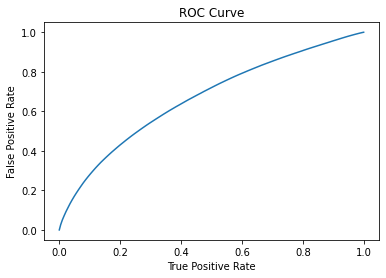

Training set areaUnderROC: 0.6656002090069685


In [94]:
logModel1Summ = logModel1.summary
logModel1SummRoc = logModel1Summ.roc.toPandas()
mp.plot(logModel1SummRoc['FPR'],logModel1SummRoc['TPR'])
mp.ylabel('False Positive Rate')
mp.xlabel('True Positive Rate')
mp.title('ROC Curve')
mp.show()
print('Training set areaUnderROC: ' + str(logModel1Summ.areaUnderROC))

In [63]:
T1 = predModel1.select("DELAYED")
T1 = T1.toPandas()

P1 = predModel1.select("prediction")
P1 = P1.toPandas()

confM = confusion_matrix(T1, P1)

Text(0.5, 1.0, 'Confusion Matrix Logistic Regression 1')

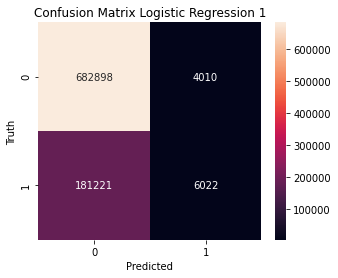

In [66]:
mp.figure(figsize = (5,4))
sns.heatmap(confM, annot=True, fmt='g')
mp.xlabel('Predicted')
mp.ylabel('Truth')
mp.title('Confusion Matrix Logistic Regression 1') 

##### Random Forest 

In [67]:
rand1 = RandomForestClassifier(featuresCol = 'FEATURES1', labelCol = 'DELAYED')
randModel1 = rand1.fit(trainA1)
predRandModel1 = randModel1.transform(testA1)
predRandModel1.select('DELAYED', 'FEATURES1',  'rawPrediction', 'prediction', 'probability').show(10)

+-------+--------------------+--------------------+----------+--------------------+
|DELAYED|           FEATURES1|       rawPrediction|prediction|         probability|
+-------+--------------------+--------------------+----------+--------------------+
|      0|(392,[0,1,2,3,12,...|[15.7822643692718...|       0.0|[0.78911321846359...|
|      0|(392,[0,1,2,3,12,...|[15.7822643692718...|       0.0|[0.78911321846359...|
|      0|(392,[0,1,2,3,12,...|[15.7822643692718...|       0.0|[0.78911321846359...|
|      1|(392,[0,1,2,3,12,...|[15.7822643692718...|       0.0|[0.78911321846359...|
|      1|(392,[0,1,2,3,12,...|[15.6526530903752...|       0.0|[0.78263265451876...|
|      0|(392,[0,1,2,3,12,...|[15.6526530903752...|       0.0|[0.78263265451876...|
|      0|(392,[0,1,2,3,12,...|[15.6526530903752...|       0.0|[0.78263265451876...|
|      1|(392,[0,1,2,3,12,...|[15.7822643692718...|       0.0|[0.78911321846359...|
|      0|(392,[0,1,2,3,12,...|[15.7822643692718...|       0.0|[0.78911321846

In [68]:
randModelAcc1 = predRandModel1.filter(predRandModel1.DELAYED == predRandModel1.prediction).count() / float(predRandModel1.count() )
print("Accuracy: ",randModelAcc1)

Accuracy:  0.7858001649600583


In [69]:
T2 = predRandModel1.select("DELAYED")
T2 = T2.toPandas()

P2 = predRandModel1.select("prediction")
P2 = P2.toPandas()

confMR = confusion_matrix(T2, P2)

Text(0.5, 1.0, 'Confusion Matrix Random Forest 1')

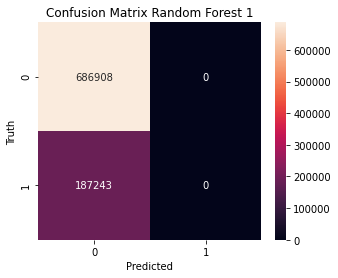

In [70]:
mp.figure(figsize = (5,4))
sns.heatmap(confMR, annot=True, fmt='g')
mp.xlabel('Predicted')
mp.ylabel('Truth')
mp.title('Confusion Matrix Random Forest 1')

##### Gradient Boosted Tree 

In [71]:
gbt1 = GBTClassifier(featuresCol = 'FEATURES1', labelCol = 'DELAYED',maxIter=10)
gbtModel1 = gbt1.fit(trainA1)
predgbtModel1 = gbtModel1.transform(testA1)
predgbtModel1.select('DELAYED', 'FEATURES1',  'rawPrediction', 'prediction', 'probability').show(10)

+-------+--------------------+--------------------+----------+--------------------+
|DELAYED|           FEATURES1|       rawPrediction|prediction|         probability|
+-------+--------------------+--------------------+----------+--------------------+
|      0|(392,[0,1,2,3,12,...|[0.84027387994830...|       0.0|[0.84297704993035...|
|      0|(392,[0,1,2,3,12,...|[0.61470053613640...|       0.0|[0.77371373071829...|
|      0|(392,[0,1,2,3,12,...|[0.61470053613640...|       0.0|[0.77371373071829...|
|      1|(392,[0,1,2,3,12,...|[0.63911721132083...|       0.0|[0.78214908622328...|
|      1|(392,[0,1,2,3,12,...|[0.52037552432200...|       0.0|[0.73899489542854...|
|      0|(392,[0,1,2,3,12,...|[0.52037552432200...|       0.0|[0.73899489542854...|
|      0|(392,[0,1,2,3,12,...|[0.52037552432200...|       0.0|[0.73899489542854...|
|      1|(392,[0,1,2,3,12,...|[0.63911721132083...|       0.0|[0.78214908622328...|
|      0|(392,[0,1,2,3,12,...|[0.63911721132083...|       0.0|[0.78214908622

In [72]:
gbtModelAcc1 = predgbtModel1.filter(predgbtModel1.DELAYED == predgbtModel1.prediction).count() / float(predgbtModel1.count() )
print("Accuracy: ",gbtModelAcc1)

Accuracy:  0.7894883149478752


Text(0.5, 1.0, 'Confusion Matrix Gradient Boosted Tree 1')

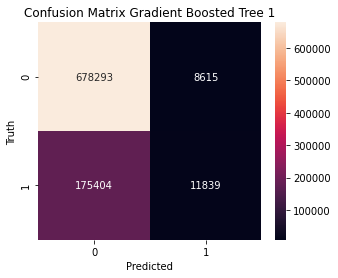

In [73]:
T3 = predgbtModel1.select("DELAYED")
T3 = T3.toPandas()

P3 = predgbtModel1.select("prediction")
P3 = P3.toPandas()

confMGBT = confusion_matrix(T3, P3)

mp.figure(figsize = (5,4))
sns.heatmap(confMGBT, annot=True, fmt='g')
mp.xlabel('Predicted')
mp.ylabel('Truth')
mp.title('Confusion Matrix Gradient Boosted Tree 1')

##### Decision Tree 

In [74]:
dt1 = DecisionTreeClassifier(featuresCol = 'FEATURES1', labelCol = 'DELAYED')
dtModel1 = dt1.fit(trainA1)
preddtModel1 = dtModel1.transform(testA1)
preddtModel1.select('DELAYED', 'FEATURES1',  'rawPrediction', 'prediction', 'probability').show(10)

+-------+--------------------+--------------------+----------+--------------------+
|DELAYED|           FEATURES1|       rawPrediction|prediction|         probability|
+-------+--------------------+--------------------+----------+--------------------+
|      0|(392,[0,1,2,3,12,...|[1137044.0,172946.0]|       0.0|[0.86797914487896...|
|      0|(392,[0,1,2,3,12,...|[1303665.0,408683.0]|       0.0|[0.76133180872112...|
|      0|(392,[0,1,2,3,12,...|[1303665.0,408683.0]|       0.0|[0.76133180872112...|
|      1|(392,[0,1,2,3,12,...|[1303665.0,408683.0]|       0.0|[0.76133180872112...|
|      1|(392,[0,1,2,3,12,...|[1303665.0,408683.0]|       0.0|[0.76133180872112...|
|      0|(392,[0,1,2,3,12,...|[1303665.0,408683.0]|       0.0|[0.76133180872112...|
|      0|(392,[0,1,2,3,12,...|[1303665.0,408683.0]|       0.0|[0.76133180872112...|
|      1|(392,[0,1,2,3,12,...|[1303665.0,408683.0]|       0.0|[0.76133180872112...|
|      0|(392,[0,1,2,3,12,...|[1303665.0,408683.0]|       0.0|[0.76133180872

In [75]:
dtModelAcc1 = preddtModel1.filter(preddtModel1.DELAYED == preddtModel1.prediction).count() / float(preddtModel1.count() )
print("Accuracy: ",dtModelAcc1)

Accuracy:  0.7888740046056116


Text(0.5, 1.0, 'Confusion Matrix Decision Tree 1')

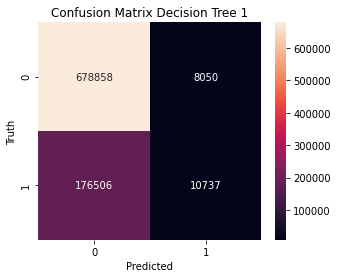

In [76]:
T4 = preddtModel1.select("DELAYED")
T4 = T4.toPandas()

P4 = preddtModel1.select("prediction")
P4 = P4.toPandas()

confMDT = confusion_matrix(T4, P4)

mp.figure(figsize = (5,4))
sns.heatmap(confMDT, annot=True, fmt='g')
mp.xlabel('Predicted')
mp.ylabel('Truth')
mp.title('Confusion Matrix Decision Tree 1')

##### Naive Bayes 

In [77]:
nb1 = NaiveBayes(featuresCol = 'FEATURES1', labelCol = 'DELAYED',modelType="multinomial")
nbModel1 = nb1.fit(trainA1)
prednbModel1 = nbModel1.transform(testA1)
prednbModel1.select('DELAYED', 'FEATURES1',  'rawPrediction', 'prediction', 'probability').show(10)

+-------+--------------------+--------------------+----------+--------------------+
|DELAYED|           FEATURES1|       rawPrediction|prediction|         probability|
+-------+--------------------+--------------------+----------+--------------------+
|      0|(392,[0,1,2,3,12,...|[-314.24233942296...|       0.0|[0.99999999910667...|
|      0|(392,[0,1,2,3,12,...|[-316.14728658384...|       0.0|[0.99999999572564...|
|      0|(392,[0,1,2,3,12,...|[-316.14728658384...|       0.0|[0.99999999572564...|
|      1|(392,[0,1,2,3,12,...|[-488.98710129907...|       0.0|[0.99965635591079...|
|      1|(392,[0,1,2,3,12,...|[-491.08125120440...|       0.0|[0.99914914579118...|
|      0|(392,[0,1,2,3,12,...|[-336.11496242141...|       0.0|[0.99999995461140...|
|      0|(392,[0,1,2,3,12,...|[-73.323477372858...|       0.0|[0.87927489911781...|
|      1|(392,[0,1,2,3,12,...|[-71.358129682142...|       0.0|[0.94729580251279...|
|      0|(392,[0,1,2,3,12,...|[-71.541425141389...|       0.0|[0.94702465941

In [78]:
nbModelAcc1 = prednbModel1.filter(prednbModel1.DELAYED == prednbModel1.prediction).count() / float(prednbModel1.count() )
print("Accuracy: ",nbModelAcc1)

Accuracy:  0.6328288819666168


Text(0.5, 1.0, 'Confusion Matrix Naive Bayes 1')

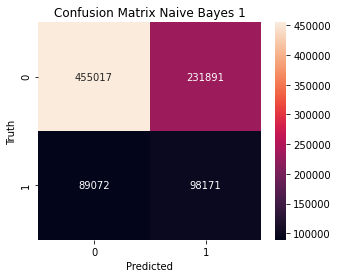

In [79]:
T5 = prednbModel1.select("DELAYED")
T5 = T5.toPandas()

P5 = prednbModel1.select("prediction")
P5 = P5.toPandas()

confMNB = confusion_matrix(T5, P5)

mp.figure(figsize = (5,4))
sns.heatmap(confMNB, annot=True, fmt='g')
mp.xlabel('Predicted')
mp.ylabel('Truth')
mp.title('Confusion Matrix Naive Bayes 1')

### With Origin State

In [80]:
vectAssemblerairlineModel2 = VectorAssembler()\
         .setInputCols (["MONTH","DAY_OF_MONTH","DAY_OF_WEEK","DISTANCE",\
                         "OP_CARRIER_INDEX_ENC","ORIGIN_STATE_ABR_INDEX","DEPPARTOFDAY_INDEX_ENC"])\
         .setOutputCol ("VAM2")

In [81]:
airlineVectAssem.groupby("DELAYED").count().show()

+-------+-------+
|DELAYED|  count|
+-------+-------+
|      1| 937806|
|      0|3430182|
+-------+-------+



In [82]:
airlineVectAssem2 = vectAssemblerairlineModel2.transform(airlineModelIndEnc)

In [83]:
airlineVectAssem2.select('VAM2').show()

+--------------------+
|                VAM2|
+--------------------+
|(24,[0,1,2,3,4,20...|
|(24,[0,1,2,3,4,20...|
|(24,[0,1,2,3,4,20...|
|(24,[0,1,2,3,4,20...|
|(24,[0,1,2,3,4,20...|
|(24,[0,1,2,3,4,20...|
|(24,[0,1,2,3,4,20...|
|(24,[0,1,2,3,4,20...|
|(24,[0,1,2,3,4,20...|
|(24,[0,1,2,3,4,20...|
|(24,[0,1,2,3,4,20...|
|(24,[0,1,2,3,4,20...|
|(24,[0,1,2,3,4,20...|
|(24,[0,1,2,3,4,20...|
|(24,[0,1,2,3,4,20...|
|(24,[0,1,2,3,4,20...|
|(24,[0,1,2,3,4,20...|
|(24,[0,1,2,3,4,20...|
|(24,[0,1,2,3,4,20...|
|(24,[0,1,2,3,4,20...|
+--------------------+
only showing top 20 rows



In [84]:
airlineVectAssemScal2 = StandardScaler().setInputCol ("VAM2").setOutputCol ("FEATURES2").fit(airlineVectAssem2).transform(airlineVectAssem2)

In [85]:
trainA2, testA2 = airlineVectAssemScal2.randomSplit([0.8,0.2],seed=123)

##### Logistic Regression

In [86]:
log2 = LogisticRegression(featuresCol = 'FEATURES2', labelCol = 'DELAYED', maxIter=5)
logModel2 = log2.fit(trainA2)
predModel2 = logModel2.transform(testA2)
predModel2.select('DELAYED', 'FEATURES2',  'rawPrediction', 'prediction', 'probability').show(10)

+-------+--------------------+--------------------+----------+--------------------+
|DELAYED|           FEATURES2|       rawPrediction|prediction|         probability|
+-------+--------------------+--------------------+----------+--------------------+
|      0|(24,[0,1,2,3,12,2...|[2.11699357916824...|       0.0|[0.89254392600265...|
|      0|(24,[0,1,2,3,12,2...|[1.32571035092403...|       0.0|[0.79013019127001...|
|      0|(24,[0,1,2,3,12,2...|[1.32571035092403...|       0.0|[0.79013019127001...|
|      1|(24,[0,1,2,3,12,2...|[1.34265944281190...|       0.0|[0.79292694565206...|
|      1|(24,[0,1,2,3,12,2...|[1.03183585692587...|       0.0|[0.73727166015399...|
|      0|(24,[0,1,2,3,12,2...|[0.99174523861621...|       0.0|[0.72943250179873...|
|      0|(24,[0,1,2,3,12,2...|[0.99324592200608...|       0.0|[0.72972857576825...|
|      1|(24,[0,1,2,3,12,2...|[1.30341921175650...|       0.0|[0.78640986836916...|
|      0|(24,[0,1,2,3,12,2...|[1.30249379033275...|       0.0|[0.78625438469

In [87]:
logModelAcc2 = predModel2.filter(predModel2.DELAYED == predModel2.prediction).count()  / float(predModel2.count() )
print("Accuracy: ",logModelAcc2)

Accuracy:  0.7858070287627652


In [ ]:
logModel2Summ = logModel2.summary
logModel2SummRoc = logModel2Summ.roc.toPandas()
mp.plot(logModel2SummRoc['FPR'],logModel2SummRoc['TPR'])
mp.ylabel('False Positive Rate')
mp.xlabel('True Positive Rate')
mp.title('ROC Curve')
mp.show()
print('Training set areaUnderROC: ' + str(logModel2Summ.areaUnderROC))

Text(0.5, 1.0, 'Confusion Matrix Logistic Regression 2')

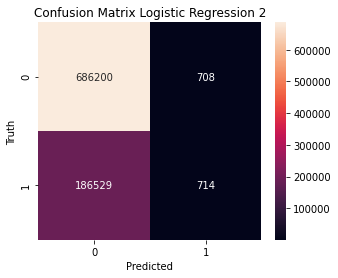

In [88]:
T11 = predModel2.select("DELAYED")
T11 = T11.toPandas()

P11 = predModel2.select("prediction")
P11 = P11.toPandas()

confM2 = confusion_matrix(T11, P11)

mp.figure(figsize = (5,4))
sns.heatmap(confM2, annot=True, fmt='g')
mp.xlabel('Predicted')
mp.ylabel('Truth')
mp.title('Confusion Matrix Logistic Regression 2')

##### Random Forest

In [89]:
rand2 = RandomForestClassifier(featuresCol = 'FEATURES2', labelCol = 'DELAYED')
randModel2 = rand2.fit(trainA2)
predRandModel2 = randModel2.transform(testA2)
predRandModel2.select('DELAYED', 'FEATURES2',  'rawPrediction', 'prediction', 'probability').show(10)

+-------+--------------------+--------------------+----------+--------------------+
|DELAYED|           FEATURES2|       rawPrediction|prediction|         probability|
+-------+--------------------+--------------------+----------+--------------------+
|      0|(24,[0,1,2,3,12,2...|[16.1450094978860...|       0.0|[0.80725047489430...|
|      0|(24,[0,1,2,3,12,2...|[15.7721544713996...|       0.0|[0.78860772356998...|
|      0|(24,[0,1,2,3,12,2...|[15.7721544713996...|       0.0|[0.78860772356998...|
|      1|(24,[0,1,2,3,12,2...|[15.7721544713996...|       0.0|[0.78860772356998...|
|      1|(24,[0,1,2,3,12,2...|[14.9984373161446...|       0.0|[0.74992186580723...|
|      0|(24,[0,1,2,3,12,2...|[14.9984373161446...|       0.0|[0.74992186580723...|
|      0|(24,[0,1,2,3,12,2...|[14.9984373161446...|       0.0|[0.74992186580723...|
|      1|(24,[0,1,2,3,12,2...|[15.7721544713996...|       0.0|[0.78860772356998...|
|      0|(24,[0,1,2,3,12,2...|[15.7721544713996...|       0.0|[0.78860772356

In [90]:
randModelAcc2 = predRandModel2.filter(predRandModel2.DELAYED == predRandModel2.prediction).count() / float(predRandModel2.count() )
print("Accuracy: ",randModelAcc2)

Accuracy:  0.7858001649600583


Text(0.5, 1.0, 'Confusion Matrix Random Forest 2')

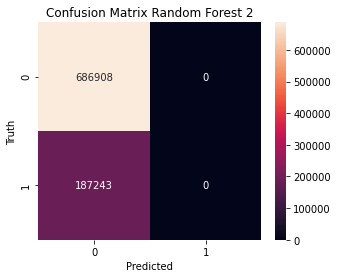

In [91]:
T22 = predRandModel2.select("DELAYED")
T22 = T22.toPandas()

P22 = predRandModel2.select("prediction")
P22 = P22.toPandas()

confMR2 = confusion_matrix(T22, P22)

mp.figure(figsize = (5,4))
sns.heatmap(confMR2, annot=True, fmt='g')
mp.xlabel('Predicted')
mp.ylabel('Truth')
mp.title('Confusion Matrix Random Forest 2')

##### Gradient Boosted Tree

In [92]:
gbt2 = GBTClassifier(featuresCol = 'FEATURES2', labelCol = 'DELAYED',maxIter=10)
gbtModel2 = gbt2.fit(trainA2)
predgbtModel2 = gbtModel2.transform(testA2)
predgbtModel2.select('DELAYED', 'FEATURES2',  'rawPrediction', 'prediction', 'probability').show(10)

+-------+--------------------+--------------------+----------+--------------------+
|DELAYED|           FEATURES2|       rawPrediction|prediction|         probability|
+-------+--------------------+--------------------+----------+--------------------+
|      0|(24,[0,1,2,3,12,2...|[0.83932919573858...|       0.0|[0.84272679829481...|
|      0|(24,[0,1,2,3,12,2...|[0.55055710569374...|       0.0|[0.75046881702933...|
|      0|(24,[0,1,2,3,12,2...|[0.55055710569374...|       0.0|[0.75046881702933...|
|      1|(24,[0,1,2,3,12,2...|[0.59657597339916...|       0.0|[0.76730431338644...|
|      1|(24,[0,1,2,3,12,2...|[0.47484923787317...|       0.0|[0.72105453501702...|
|      0|(24,[0,1,2,3,12,2...|[0.47484923787317...|       0.0|[0.72105453501702...|
|      0|(24,[0,1,2,3,12,2...|[0.47484923787317...|       0.0|[0.72105453501702...|
|      1|(24,[0,1,2,3,12,2...|[0.59657597339916...|       0.0|[0.76730431338644...|
|      0|(24,[0,1,2,3,12,2...|[0.59657597339916...|       0.0|[0.76730431338

In [93]:
gbtModelAcc2 = predgbtModel2.filter(predgbtModel2.DELAYED == predgbtModel2.prediction).count() / float(predgbtModel2.count() )
print("Accuracy: ",gbtModelAcc2)

Accuracy:  0.7903028195357553


Text(0.5, 1.0, 'Confusion Matrix Gradient Boosted Tree 2')

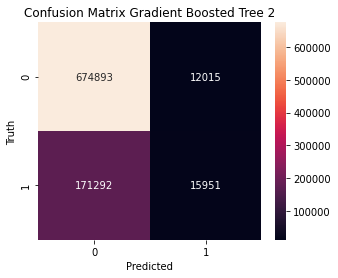

In [94]:
T33 = predgbtModel2.select("DELAYED")
T33 = T33.toPandas()

P33 = predgbtModel2.select("prediction")
P33 = P33.toPandas()

confMGBT2 = confusion_matrix(T33, P33)

mp.figure(figsize = (5,4))
sns.heatmap(confMGBT2, annot=True, fmt='g')
mp.xlabel('Predicted')
mp.ylabel('Truth')
mp.title('Confusion Matrix Gradient Boosted Tree 2')

##### Decision Tree

In [95]:
dt2 = DecisionTreeClassifier(featuresCol = 'FEATURES2', labelCol = 'DELAYED')
dtModel2 = dt2.fit(trainA2)
preddtModel2 = dtModel2.transform(testA2)
preddtModel2.select('DELAYED', 'FEATURES2',  'rawPrediction', 'prediction', 'probability').show(10)

+-------+--------------------+--------------------+----------+--------------------+
|DELAYED|           FEATURES2|       rawPrediction|prediction|         probability|
+-------+--------------------+--------------------+----------+--------------------+
|      0|(24,[0,1,2,3,12,2...|[1137044.0,172946.0]|       0.0|[0.86797914487896...|
|      0|(24,[0,1,2,3,12,2...|[1303665.0,408683.0]|       0.0|[0.76133180872112...|
|      0|(24,[0,1,2,3,12,2...|[1303665.0,408683.0]|       0.0|[0.76133180872112...|
|      1|(24,[0,1,2,3,12,2...|[1303665.0,408683.0]|       0.0|[0.76133180872112...|
|      1|(24,[0,1,2,3,12,2...|[1303665.0,408683.0]|       0.0|[0.76133180872112...|
|      0|(24,[0,1,2,3,12,2...|[1303665.0,408683.0]|       0.0|[0.76133180872112...|
|      0|(24,[0,1,2,3,12,2...|[1303665.0,408683.0]|       0.0|[0.76133180872112...|
|      1|(24,[0,1,2,3,12,2...|[1303665.0,408683.0]|       0.0|[0.76133180872112...|
|      0|(24,[0,1,2,3,12,2...|[1303665.0,408683.0]|       0.0|[0.76133180872

In [96]:
dtModelAcc2 = preddtModel2.filter(preddtModel2.DELAYED == preddtModel2.prediction).count() / float(preddtModel2.count() )
print("Accuracy: ",dtModelAcc2)

Accuracy:  0.7890295841336337


Text(0.5, 1.0, 'Confusion Matrix Decision Tree 2')

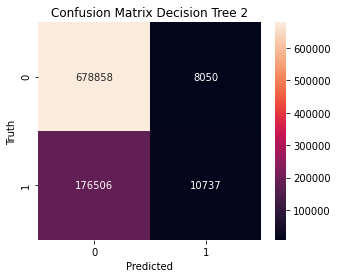

In [97]:
T44 = preddtModel2.select("DELAYED")
T44 = T44.toPandas()

P44 = preddtModel2.select("prediction")
P44 = P44.toPandas()

confMDT2 = confusion_matrix(T44, P4)

mp.figure(figsize = (5,4))
sns.heatmap(confMDT2, annot=True, fmt='g')
mp.xlabel('Predicted')
mp.ylabel('Truth')
mp.title('Confusion Matrix Decision Tree 2')

##### Naive Bayes

In [98]:
nb2 = NaiveBayes(featuresCol = 'FEATURES2', labelCol = 'DELAYED',modelType="multinomial")
nbModel2 = nb2.fit(trainA2)
prednbModel2 = nbModel2.transform(testA2)
prednbModel2.select('DELAYED', 'FEATURES2',  'rawPrediction', 'prediction', 'probability').show(10)

+-------+--------------------+--------------------+----------+--------------------+
|DELAYED|           FEATURES2|       rawPrediction|prediction|         probability|
+-------+--------------------+--------------------+----------+--------------------+
|      0|(24,[0,1,2,3,12,2...|[-44.760193831755...|       0.0|[0.99371835994976...|
|      0|(24,[0,1,2,3,12,2...|[-46.361434996846...|       0.0|[0.97134130358238...|
|      0|(24,[0,1,2,3,12,2...|[-46.361434996846...|       0.0|[0.97134130358238...|
|      1|(24,[0,1,2,3,12,2...|[-44.694376643268...|       0.0|[0.97239382852210...|
|      1|(24,[0,1,2,3,12,2...|[-46.597271301253...|       0.0|[0.93524652417395...|
|      0|(24,[0,1,2,3,12,2...|[-44.023260379161...|       0.0|[0.93073294038425...|
|      0|(24,[0,1,2,3,12,2...|[-43.788684719406...|       0.0|[0.93096855091808...|
|      1|(24,[0,1,2,3,12,2...|[-41.987439513980...|       0.0|[0.97044712564270...|
|      0|(24,[0,1,2,3,12,2...|[-42.132094504163...|       0.0|[0.97038232029

In [99]:
nbModelAcc2 = prednbModel2.filter(prednbModel2.DELAYED == prednbModel2.prediction).count() / float(prednbModel2.count() )
print("Accuracy: ",nbModelAcc2)

Accuracy:  0.7311906066572023


Text(0.5, 1.0, 'Confusion Matrix Naive Bayes 2')

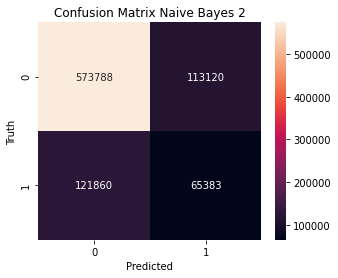

In [100]:
T55 = prednbModel2.select("DELAYED")
T55 = T55.toPandas()

P55 = prednbModel2.select("prediction")
P55 = P55.toPandas()

confMNB2 = confusion_matrix(T55, P55)

mp.figure(figsize = (5,4))
sns.heatmap(confMNB2, annot=True, fmt='g')
mp.xlabel('Predicted')
mp.ylabel('Truth')
mp.title('Confusion Matrix Naive Bayes 2')